<p align="CENTER"><i><font face = "Lora">MODEL INTERPRETABILITY TRIAL EXPREMENT by <a href="https://www.linkedin.com/in/fitsum-m-25a01a185/">FITSUM MESFIN</a></i>
<hr style="border:2px solid black"> </hr>

#### **<i>Objectives**
<font face = "Lora">

* Activation Value Extraction from Each Layer of the Model
* Determining the Variance of the Activation Value
* Finding the Correlation Between Each Activation Value
* Visualizing the Correlation in the Graph
* Generating the Embeddings from the Graph
* Clustering the Embeddings Generated
<br>

In [1]:
# IMPORT LIBRARIES
import tensorflow as tf
from keras.datasets import cifar10
from keras.applications import VGG16
from keras.models import Model, Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Flatten
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split 
from scipy.stats import spearmanr 
from keras.optimizers import Adam
import os
from keras.applications import MobileNetV2
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model
import numpy as np

In [2]:
# CUDA ENVIRONMENT
os.environ['CUDA_VISIBLE_DEVICES'] = "0"
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("TensorFlow Version: ", tf.__version__)

Num GPUs Available:  1
TensorFlow Version:  2.10.1


In [3]:
# LOAD DATASET
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

In [4]:
# PRE-PROCESS THE DATA
x_train_full = x_train_full.astype('float')/255
x_test = x_test.astype('float')/255
y_train_full = to_categorical(y_train_full, 10)
y_test = to_categorical(y_test, 10)

In [5]:
# TRAIN VALID SPLIT
x_train, x_valid, y_train, y_valid= train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

In [6]:
# BUILD A MODEL
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 global_average_pooling2d (G  (None, 64)               0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                4

In [7]:
# COMPILE THE MODEL
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=['accuracy'])

In [8]:
# TRAIN THE MODEL
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_valid, y_valid))

Epoch 1/50
1250/1250 [==============================] - 12s 5ms/step - loss: 2.0259 - accuracy: 0.2312 - val_loss: 1.8591 - val_accuracy: 0.2816
Epoch 2/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8102 - accuracy: 0.2989 - val_loss: 1.7618 - val_accuracy: 0.3206
Epoch 3/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7420 - accuracy: 0.3271 - val_loss: 1.7202 - val_accuracy: 0.3413
Epoch 4/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7008 - accuracy: 0.3454 - val_loss: 1.6839 - val_accuracy: 0.3581
Epoch 5/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6718 - accuracy: 0.3597 - val_loss: 1.6648 - val_accuracy: 0.3650
Epoch 6/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6486 - accuracy: 0.3693 - val_loss: 1.6519 - val_accuracy: 0.3719
Epoch 7/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6301 - accuracy: 0.3796 - val_loss: 1.6146 - val_accuracy

In [46]:
# EVALUATE THE MODEL PERFORMANCE (5 SAMPLE)
loss, accuracy = model.evaluate(x_test, y_test)
print("Test loss: ", loss)
print("Test accuracy: ", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 1.1341 - accuracy: 0.5922
Test loss:  1.1340694427490234
Test accuracy:  0.592199981212616


In [47]:
# EXTRACT THE LAYER NAME FROM THE MODEL
layer_names = []
for layer in model.layers:
    layer_names.append(layer.name)
layer_names

['conv2d',
 'conv2d_1',
 'max_pooling2d',
 'conv2d_2',
 'global_average_pooling2d',
 'dense',
 'dense_1',
 'dense_2']

In [48]:
# EXTRACT THE ACTIVATIONS VALUE FROM SPECIFIED LAYER NAMES
def get_activations(model, X, layer_names):
    activations = []
    for layer in layer_names:
        outputs = model.get_layer(layer).output
        activation_model = tf.keras.models.Model(inputs=model.input, outputs=outputs)
        temp = activation_model.predict(X)
        activations.append(temp)
    return activations

In [101]:
# STORE THE EXTRACTED ACTIVATION VALUES FOR TEST SAMPELS
activations = get_activations(model, x_test, layer_names)

313/313 [==============================] - 0s 1ms/step


In [102]:
# CHECK THE SHAPE OF ACTIVATION VALUES EXTRACTED
for act in activations:
    print(act.shape)

(10000, 30, 30, 32)
(10000, 28, 28, 64)
(10000, 14, 14, 64)
(10000, 12, 12, 64)
(10000, 64)
(10000, 64)
(10000, 32)
(10000, 10)


In [103]:
# RESHAPE THE ACTIVATION VALUES INTO  TWO DIMENSIONS
def get_reshaped_activations(activations):
    for i in range(len(activations)):
        if len(activations[i].shape) > 2:
            activations[i] = np.reshape(activations[i], (activations[i].shape[0], -1))
    return activations

In [104]:
# STORE RESHAPED ACTIVATION VALUES
reshaped_activation = get_reshaped_activations(activations)

In [105]:
# CHECK THE RESHAPED ACTIVATION VALUES
for act in reshaped_activation:
    print(act.shape)

(10000, 28800)
(10000, 50176)
(10000, 12544)
(10000, 9216)
(10000, 64)
(10000, 64)
(10000, 32)
(10000, 10)


In [106]:
# CALCULATE THE VARIANCE OF THE ACTIVATION VALUES
def calculate_variances(activations):
    variances = [np.var(act) for act in activations]
    return variances

In [107]:
# STORE THE VARIANCE AND CHECK THEIR VALUES
variances = calculate_variances(reshaped_activation)
variances
# NB: THE MOST IMPORTANT LAYERS HAVE A HIGH VARIANCE

[0.006398618,
 0.03140217,
 0.041532848,
 0.5907113,
 0.29349566,
 0.70255905,
 1.4041337,
 0.034167536]

In [108]:
# GET THE INDEX OF LAYERS WITH HIGH VARIANCE AND DISCARD THE REST EXCEPT THE LAST LAYER, B/C LAST LAYER WILL BE IMPORTANT PART OF THE ANALYSIS. thershold will be 0.2
def get_layer_indices_with_high_variance(variances):
    all_indices = list(range(len(variances)))
    high_variance_indices = [i for i, var in enumerate(variances) if var > 0.2]
    high_variance_indices.append(len(variances)-1)
    return all_indices, high_variance_indices
original_index, important_index = get_layer_indices_with_high_variance(variances)
original_index, important_index

([0, 1, 2, 3, 4, 5, 6, 7], [3, 4, 5, 6, 7])

In [109]:
# GET THE ACTIVATION FROM THE HIGHER VARIANCE LAYERS
def get_activations_from_high_variance_layers(reshaped_activation, important_index):
    important_activation = []
    for i in important_index:
        important_activation.append(reshaped_activation[i])
    return important_activation
important_activation = get_activations_from_high_variance_layers(reshaped_activation, important_index)

In [110]:
# CHECK THE SHAPE OF HIGH VARINACE LAYERS ACTIVATION VALUE
for act in important_activation:
    print(act.shape)

(10000, 9216)
(10000, 64)
(10000, 64)
(10000, 32)
(10000, 10)


In [111]:
# GET THE CORRELATION MATRIX BETWEEN EACH ACTIVATION FROM EACH LAYER
def generate_co_activation_matrix(activations):
    num_samples = activations[0].shape[0]
    num_neurons = sum(act.shape[1] for act in activations)
    co_activation_matrix = np.zeros((num_neurons, num_neurons))
    concatenated_activations = np.concatenate([act.reshape(num_samples, -1) for act in activations], axis=1)
    co_activation_matrix = np.corrcoef(concatenated_activations, rowvar=False)
    return co_activation_matrix
co_activation_matrix = generate_co_activation_matrix(important_activation)

c:\Users\MSI\miniconda3\envs\tf\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\MSI\miniconda3\envs\tf\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [112]:
# CHECK THE SHAPE OF CO-ACTIVATION MATRIX
co_activation_matrix.shape

(9386, 9386)

In [130]:
# STORE THE LAST LAYERS NODE LABEL
last_layers_node = [0,1,2,3,4,5,6,7,8,9]

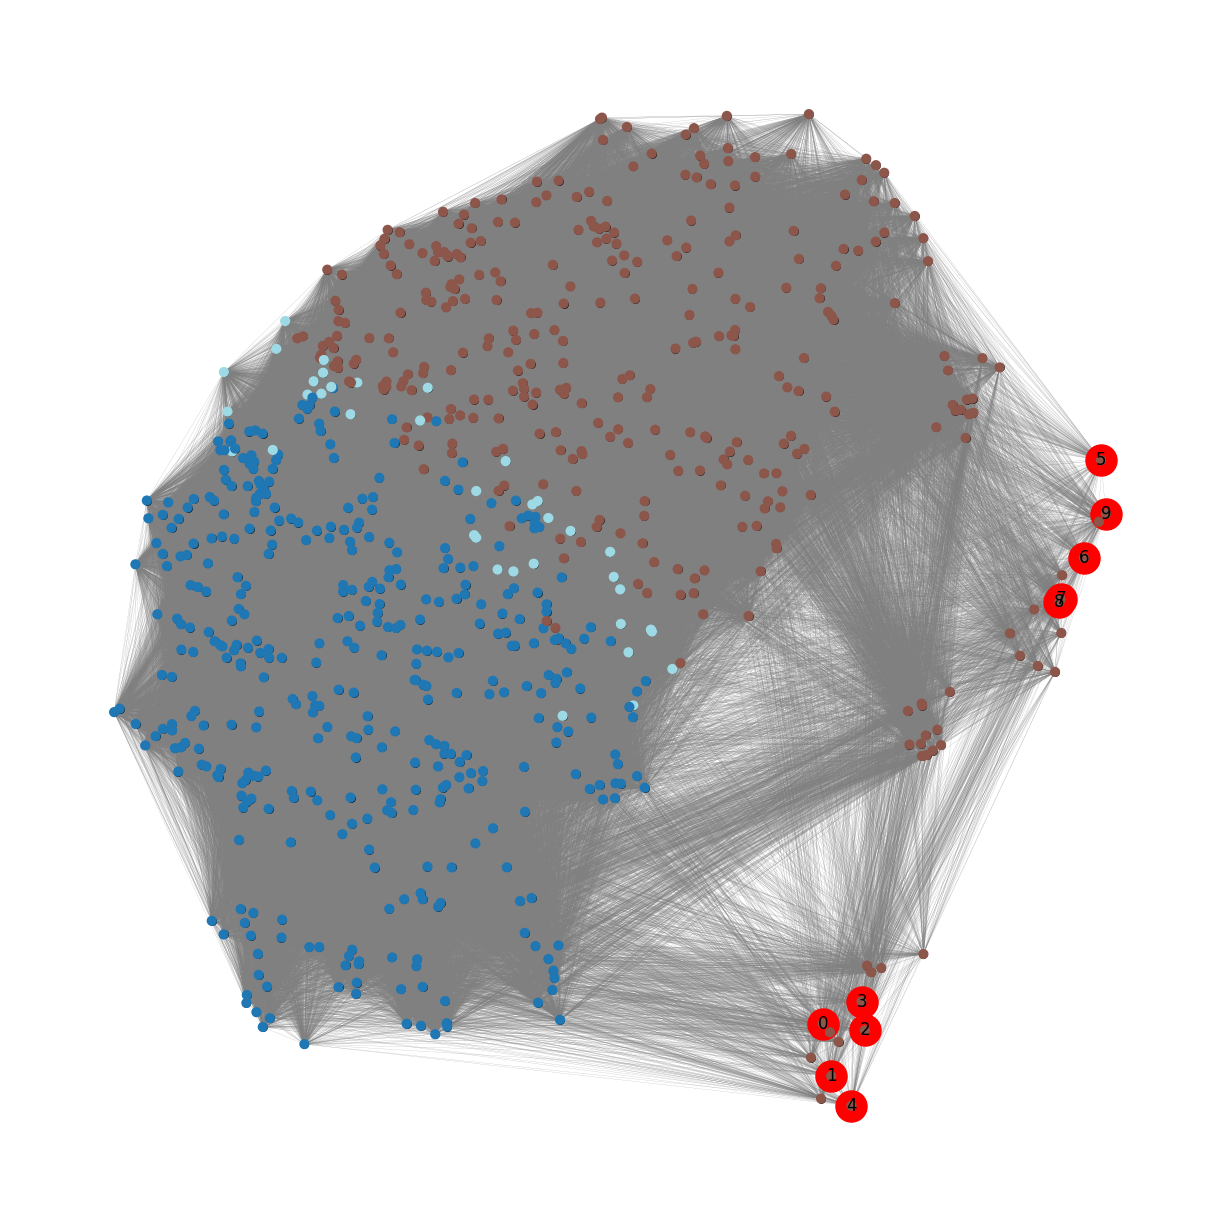

In [122]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import community 

G = nx.Graph()

for i in range(len(co_activation_matrix[-800:, -800:])):
    for j in range(len(co_activation_matrix[-800:, -800:])):
        if co_activation_matrix[i][j] > 0.0 and i != j:  # THRESHOLD =0.0 MEANING POSITIVE CORRELATION
            G.add_edge(i, j)

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, seed=42)
options = {
    "node_size": 40,
    "edge_color": "gray",
    "linewidths": 0,
    "width": 0.1,
}

nx.draw(G, pos, node_color="black", **options)

# THE LAST 10 NODES ARE FROM THE LAST LAYER
last_10_nodes = list(G.nodes())[-1 * int(important_activation[-1].shape[1]):]
node_labels = {node: label for node, label in zip(last_10_nodes, last_layers_node)}

nx.draw_networkx_nodes(G, pos, nodelist=last_10_nodes, node_size=500, node_color="red")
nx.draw_networkx_labels(G, pos, labels=node_labels)

# COMMUNITY DETECTION ALGORITH TO CLUSTER THE NODES
partition = community.best_partition(G)

nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color=list(partition.values()), cmap=plt.cm.tab20, node_size=40)

plt.show()


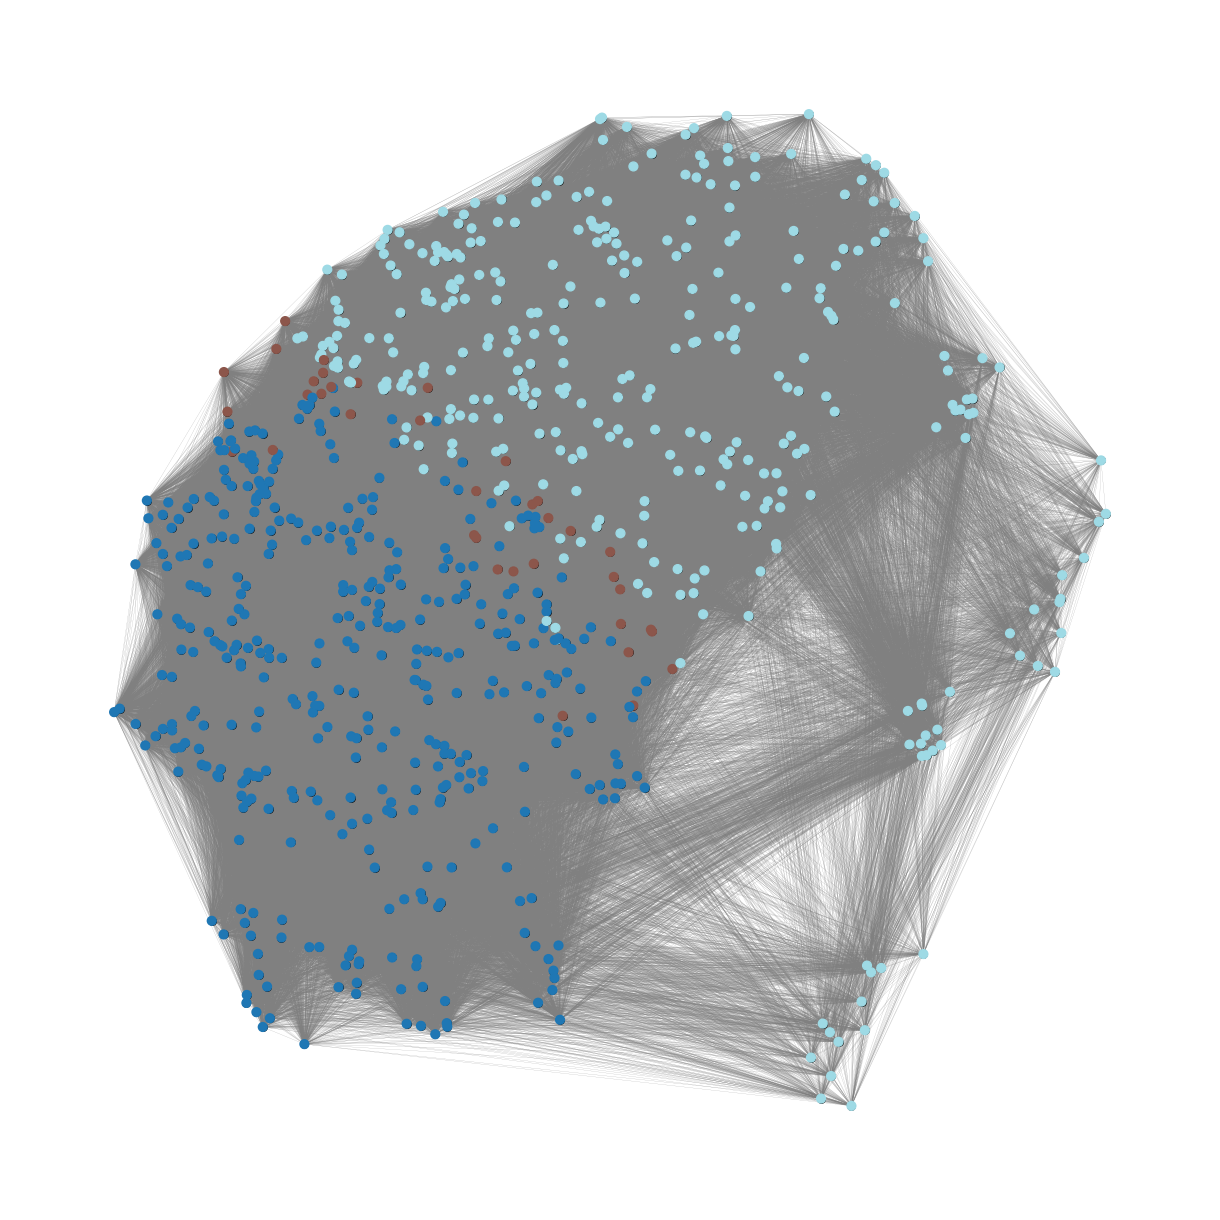

In [128]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import community 

G = nx.Graph()
for i in range(len(co_activation_matrix[-800:, -800:])):
    for j in range(len(co_activation_matrix[-800:, -800:])):
        if co_activation_matrix[i][j] > 0.0 and i != j:  # THRESHOLD =0.0 MEANING POSITIVE CORRELATION
            G.add_edge(i, j)

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, seed=42)
options = {
    "node_size": 40,
    "edge_color": "gray",
    "linewidths": 0,
    "width": 0.1,
}

nx.draw(G, pos, node_color="black", **options)


partition = community.best_partition(G)

nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color=list(partition.values()), cmap=plt.cm.tab20, node_size=40)

plt.show()


[116.26678490054128, 149.9699788610988, 135.87049105768654, 111.98777274602028, 129.46064841556512, 132.93110396875184, 89.37075976643096, 159.34249681113863, 153.30014129833512, 151.117286433497, 146.79868343338455, 154.1737925733356, 132.84977441529537, 146.18552216706357, 149.2583006588073, 105.92115609397274, 102.95751650262349, 152.08666715412608, 132.12159026580912, 138.9336976779457, 140.50802857908968, 130.70171154937415, 133.65502219589177, 146.75771436110395, 72.66365235587439, 157.91020969651476, 100.76887854245298, 147.95057286583767, 140.05841587502243, 105.53034688128028, 158.00450242501896, 148.67095042038008, 120.66264250006982, 122.06626036384453, 142.89639278359886, 120.85093497016818, 91.99765156348899, 158.35074832182224, 109.83083622161526, 151.5585048432959, 124.52533385448712, 132.2305434335062, 93.1265706527989, 160.67752805422347, 149.27134587122833, 150.70990351256924, 144.88394423973057, 156.49136605525104, 147.28033050467172, 150.63459539172624, 109.71254524

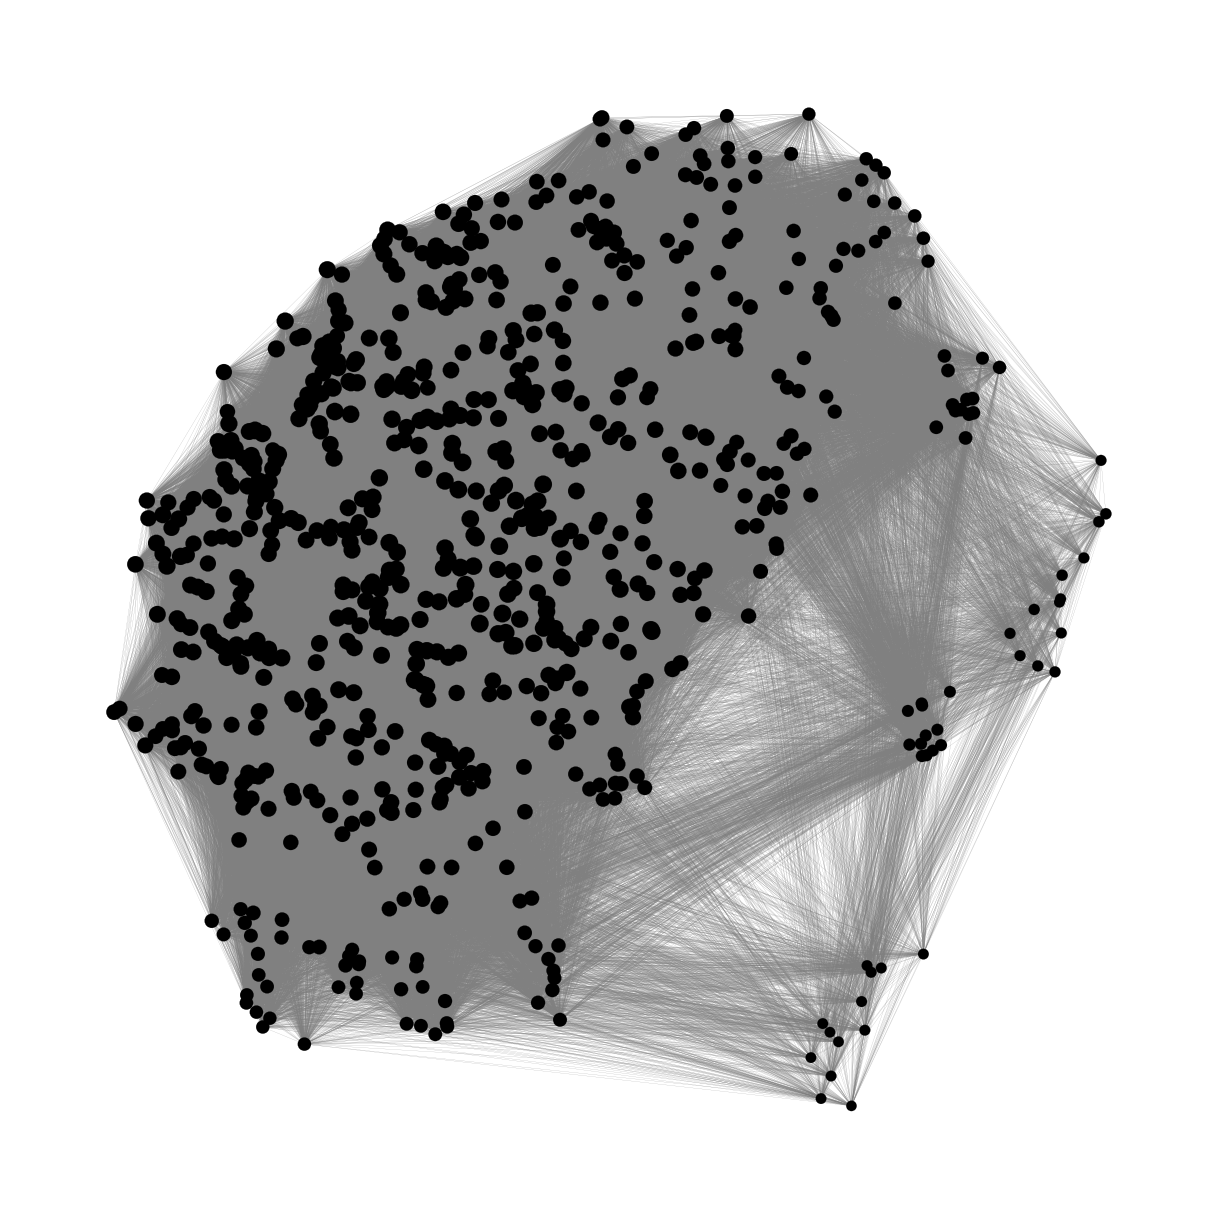

In [129]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np


G = nx.Graph()

for i in range(len(co_activation_matrix[-800:, -800:])):
    for j in range(len(co_activation_matrix[-800:, -800:])):
        if co_activation_matrix[i][j] > 0.0 and i != j:  # THRESHOLD =0.0 MEANING POSITIVE CORRELATION
            G.add_edge(i, j)

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, seed=42)
pagerank_centrality = nx.pagerank(G)
# PAGE RANK ALGORITHM TO SIZE THE NODES
node_sizes = [pagerank_centrality[node] * 100000 for node in G.nodes()]

print(node_sizes)


options = {
    "node_size": node_sizes,
    "node_color": "black",
    "edge_color": "gray",
    "linewidths": 0.1,
    "width": 0.1,
}

nx.draw(G, pos, **options)

plt.show()


In [131]:
import networkx as nx
from node2vec import Node2Vec

# Create Graph
# CREATE THE GRAPH
G = nx.karate_club_graph()


for i in range(len(co_activation_matrix[-800:, -800:])):
    for j in range(len(co_activation_matrix[-800:, -800:])):
        if co_activation_matrix[i][j] > 0.0 and i != j:  # THRESHOLD > 0.0 MEANING POSITIVE CORRELATION
            G.add_edge(i, j)

# BUILD THE MODEL AND TRAIN
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1, batch_words=4)

nodes_to_get_embeddings_for = list(G.nodes())[-1 * int(important_activation[-1].shape[1]):]
embeddings = {node: model.wv[str(node)] for node in nodes_to_get_embeddings_for}

# PRINT THE EMBEDDINGS
for node_id, embedding in embeddings.items():
    print("Embedding for node", node_id, ":", embedding)

Computing transition probabilities:   0%|          | 0/764 [00:00<?, ?it/s]

Embedding for node 350 : [-0.20237981  0.19444972  0.00438308 -0.09338274 -0.05818503  0.3000322
 -0.01210741 -0.04188353  0.29540336 -0.2736873   0.27885354  0.07475428
 -0.05741409  0.03533635 -0.03406713 -0.43750742  0.21261078  0.1931069
  0.37720913 -0.5471549   0.05459855 -0.32347777  0.05348314  0.4635055
  0.31210628 -0.16164732  0.01904242  0.2079277  -0.06002003  0.56337225
  0.28273264  0.53422415 -0.15645392  0.06298065 -0.33159375  0.12032592
  0.2695506   0.2496793   0.0296455   0.01161694 -0.08162656 -0.19237606
  0.40258113 -0.09961352  0.00107855  0.03712663 -0.19655925 -0.2283044
  0.36737093 -0.06273433  0.09185473  0.29212207  0.29979768 -0.50317323
  0.38010883  0.10961103 -0.00825564 -0.03629596 -0.15727156  0.14192493
 -0.61881447  0.04915138 -0.29659614  0.519457  ]
Embedding for node 414 : [-0.18737508  0.06109035  0.0580695  -0.1416969  -0.1029444   0.10933244
  0.08292849 -0.12208784  0.393375   -0.29789013  0.32434115  0.2636362
 -0.06783289 -0.01157634  0.1

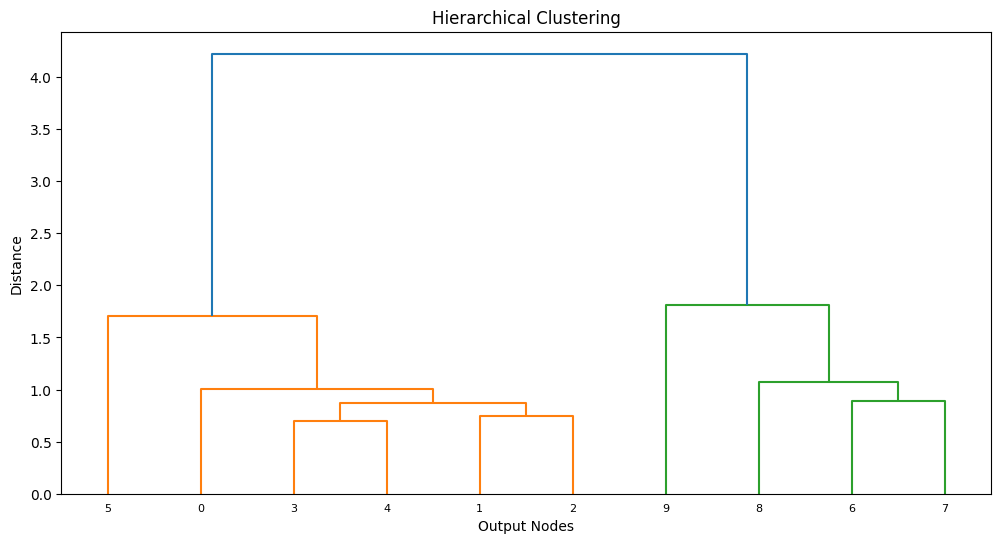

In [132]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# EXTRACT THE EMBEDDINGS AS NUMPY ARRAY
embedding_array = np.array([embedding for embedding in embeddings.values()])

# HIERARCHICAL CLSUSTERING
Z = linkage(embedding_array, 'ward')

plt.figure(figsize=(12, 6))
plt.title('Hierarchical Clustering')
plt.xlabel('Output Nodes')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=0,  
    leaf_font_size=8., 
    labels=last_layers_node,  
)
plt.show()
# THE EMBEDDING WILL BE GENERATED ONLY FOR LAST LAYERS NODE